<a href="https://colab.research.google.com/github/33Martin22/33Martin22/blob/main/Linear_Regression_Model_on_London_Weather_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression mode**l
Here the dataset used is london weather  dataset containing the following  columns:

**DATE:** Date in `YYYYMMDD` format.

**TX**: Daily maximum temperature in 0.1°C.

**TN:** Daily minimum temperature in 0.1°C.

**TG:** Daily mean temperature in 0.1°C.

**SS:** Daily sunshine duration in 0.1 hours.

**SD:** Daily snow depth in 1 cm.

**RR**: Daily precipitation amount in 0.1 mm.

**QQ:** Daily global radiation in W/m².

**PP:** Daily sea level pressure in 0.1 hPa.

**HU**: Daily relative humidity in %.

**CC**:Daily cloud cover in oktas.

after cleaning the dataset  the visualizations are made comparing the trend of the temperatures over time,the trend odf sunshine over years ,the trend of precipitations rates over the years

In [51]:
#import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet

**Reading the dataset** (london_weather_data.csv)

In [3]:
df=pd.read_csv("london_weather_data.csv")

In [4]:
df.head()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,Q_SD,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,0,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,0,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,0,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,0,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,0,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0


In [5]:
df.tail()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,Q_SD,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
16431,20231227,126.0,0,55.0,0,89.0,0,0.0,0,0.0,0,46.0,0,12.0,0,10067.0,0,89.0,0,8.0,0
16432,20231228,119.0,0,97.0,0,112.0,0,2.0,0,0.0,0,48.0,0,15.0,0,10051.0,0,81.0,0,7.0,0
16433,20231229,122.0,0,92.0,0,106.0,0,7.0,0,0.0,0,0.0,0,20.0,0,10071.0,0,78.0,0,6.0,0
16434,20231230,107.0,0,56.0,0,89.0,0,0.0,0,0.0,0,56.0,0,12.0,0,10046.0,0,87.0,0,7.0,0
16435,20231231,124.0,0,57.0,0,82.0,0,5.0,0,0.0,0,16.0,0,18.0,0,9891.0,0,85.0,0,7.0,0


In [7]:
df.shape

(16436, 21)

In [8]:
df.describe()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,Q_SD,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
count,1.643600e+04,16436.000000,16436.000000,16436.000000,16436.000000,16407.000000,16436.000000,16436.000000,16436.0,15361.000000,16436.000000,16436.000000,16436.0,16411.00000,16436.000000,16432.000000,16436.00000,16379.000000,16436.000000,16418.000000,16436.000000
mean,2.001066e+07,154.686846,0.068082,76.016427,0.015454,115.373316,0.083962,43.153626,0.0,0.034633,0.588647,16.791738,0.0,119.52020,0.017036,10153.889423,0.00219,76.283717,0.031212,5.256426,0.009978
std,1.298742e+05,65.741246,0.251895,53.392049,0.123353,57.457444,0.451623,39.992648,0.0,0.519639,2.225223,37.614507,0.0,89.26958,0.355343,105.196268,0.14039,10.520699,0.529104,2.091593,0.297885
min,1.979010e+07,-62.000000,0.000000,-118.000000,0.000000,-76.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,9596.000000,0.00000,33.000000,0.000000,0.000000,0.000000
25%,1.990040e+07,106.000000,0.000000,36.000000,0.000000,72.000000,0.000000,4.000000,0.0,0.000000,0.000000,0.000000,0.0,42.00000,0.000000,10091.000000,0.00000,69.000000,0.000000,4.000000,0.000000
50%,2.001070e+07,151.000000,0.000000,78.000000,0.000000,114.000000,0.000000,35.000000,0.0,0.000000,0.000000,0.000000,0.0,96.00000,0.000000,10162.000000,0.00000,77.000000,0.000000,6.000000,0.000000
75%,2.012095e+07,204.000000,0.000000,118.000000,0.000000,161.000000,0.000000,71.000000,0.0,0.000000,0.000000,16.000000,0.0,187.00000,0.000000,10225.000000,0.00000,84.000000,0.000000,7.000000,0.000000
max,2.023123e+07,402.000000,1.000000,223.000000,1.000000,309.000000,9.000000,157.000000,0.0,22.000000,9.000000,618.000000,0.0,402.00000,9.000000,10477.000000,9.00000,100.000000,9.000000,9.000000,9.000000


In [11]:
df.isnull()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,Q_SD,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16432,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16433,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df['DATE']=pd.to_datetime(df["DATE"],format='%Y%m%d')

In [13]:
#make the date column the index
df.set_index("DATE",inplace=True)


In [18]:
print("\n Desceriptive statistics for the dataset:")

print(df.describe())


 Desceriptive statistics for the dataset:
                 TX          Q_TX            TN  ...          Q_HU            CC          Q_CC
count  16436.000000  16436.000000  16436.000000  ...  16436.000000  16418.000000  16436.000000
mean     154.686846      0.068082     76.016427  ...      0.031212      5.256426      0.009978
std       65.741246      0.251895     53.392049  ...      0.529104      2.091593      0.297885
min      -62.000000      0.000000   -118.000000  ...      0.000000      0.000000      0.000000
25%      106.000000      0.000000     36.000000  ...      0.000000      4.000000      0.000000
50%      151.000000      0.000000     78.000000  ...      0.000000      6.000000      0.000000
75%      204.000000      0.000000    118.000000  ...      0.000000      7.000000      0.000000
max      402.000000      1.000000    223.000000  ...      9.000000      9.000000      9.000000

[8 rows x 20 columns]


<ipython-input-25-a8097a926bb6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_mean_temp = df['TG'].resample('Y').mean()  # Resample to annual frequency and calculate the mean


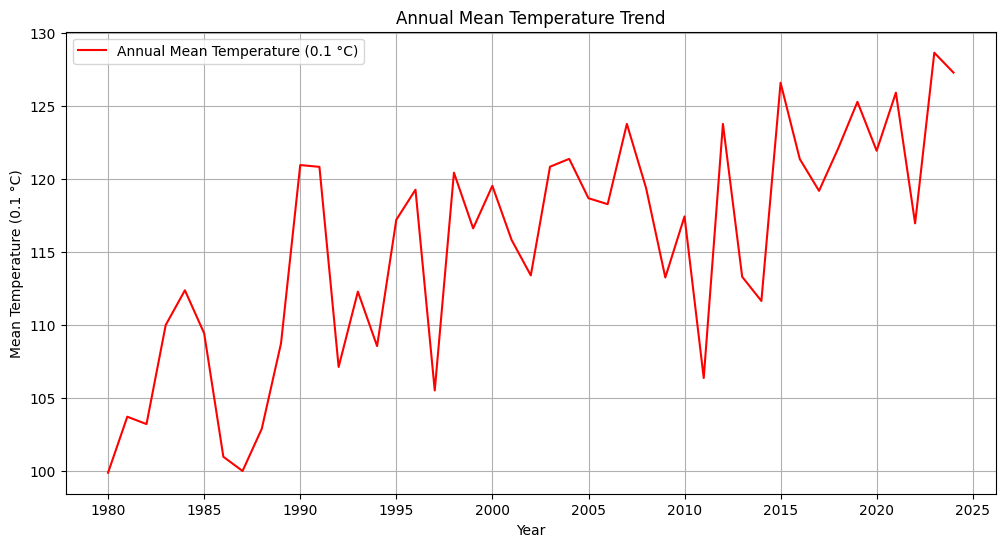

In [25]:
annual_mean_temp = df['TG'].resample('Y').mean()  # Resample to annual frequency and calculate the mean
plt.figure(figsize=(12, 6))
plt.plot(annual_mean_temp, label='Annual Mean Temperature (0.1 °C)', color='red')
plt.title("Annual Mean Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Mean Temperature (0.1 °C)")
plt.legend()
plt.grid()
plt.show()

<ipython-input-26-2cee9df40da8>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_precip = df['RR'].resample('M').mean()  # Resample to monthly frequency


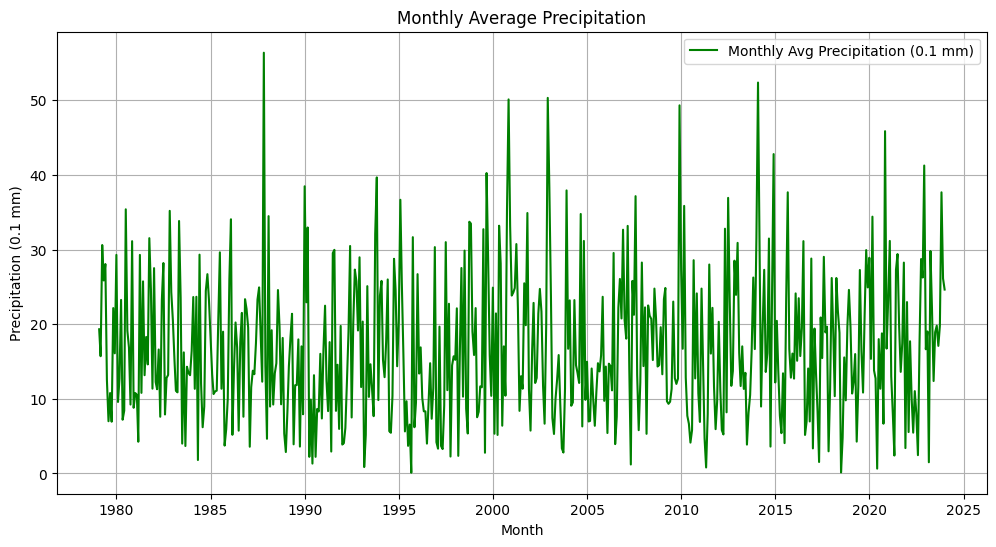

In [26]:
# 2. Monthly Average Precipitation
monthly_precip = df['RR'].resample('M').mean()  # Resample to monthly frequency
plt.figure(figsize=(12, 6))
plt.plot(monthly_precip, label='Monthly Avg Precipitation (0.1 mm)', color='green')
plt.title("Monthly Average Precipitation")
plt.xlabel("Month")
plt.ylabel("Precipitation (0.1 mm)")
plt.legend()
plt.grid()
plt.show()

<ipython-input-27-aadbf7a5058e>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_sunshine = df['SS'].resample('Y').mean()  # Annual total sunshine duration


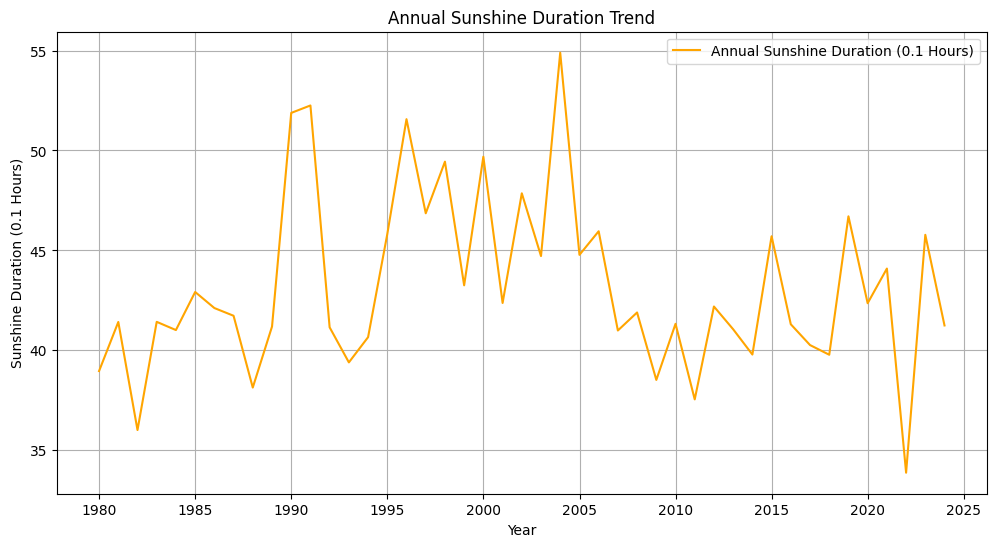

In [27]:
# 3. Sunshine Duration Trends
annual_sunshine = df['SS'].resample('Y').mean()  # Annual total sunshine duration
plt.figure(figsize=(12, 6))
plt.plot(annual_sunshine, label='Annual Sunshine Duration (0.1 Hours)', color='orange')
plt.title("Annual Sunshine Duration Trend")
plt.xlabel("Year")
plt.ylabel("Sunshine Duration (0.1 Hours)")
plt.legend()
plt.grid()
plt.show()

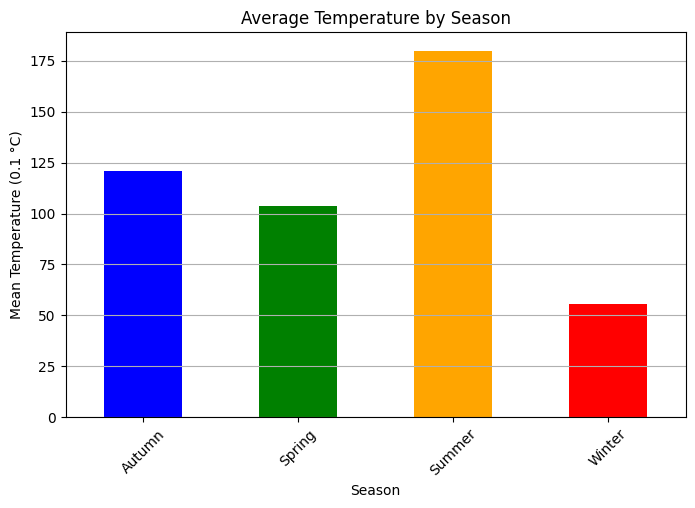

<ipython-input-28-cc700e2a6e00>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='RR', x='Season', palette='coolwarm')


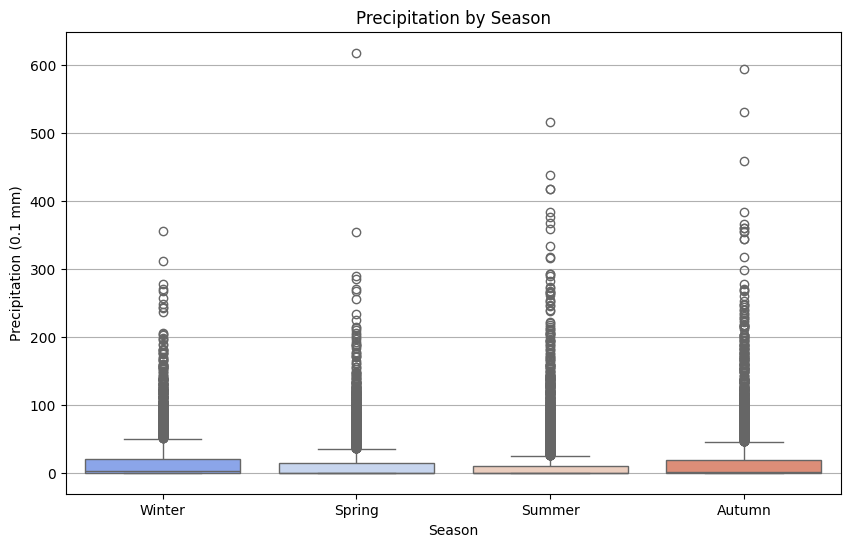

Analysis completed. Charts displayed and results saved.


In [28]:
# 4. Seasonal Analysis of Mean Temperature
# Extract seasons
df['Month'] = df.index.month
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})
seasonal_mean_temp = df.groupby('Season')['TG'].mean()

plt.figure(figsize=(8, 5))
seasonal_mean_temp.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title("Average Temperature by Season")
plt.xlabel("Season")
plt.ylabel("Mean Temperature (0.1 °C)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 5. Precipitation Outliers Analysis (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='RR', x='Season', palette='coolwarm')
plt.title("Precipitation by Season")
plt.xlabel("Season")
plt.ylabel("Precipitation (0.1 mm)")
plt.grid(axis='y')
plt.show()

# Save Results for Future Use (optional)
results = {
    'Annual Mean Temperature': annual_mean_temp,
    'Monthly Avg Precipitation': monthly_precip,
    'Annual Sunshine Duration': annual_sunshine,
    'Seasonal Mean Temperature': seasonal_mean_temp
}

for name, series in results.items():
    series.to_csv(f"{name.replace(' ', '_').lower()}.csv")

print("Analysis completed. Charts displayed and results saved.")

In [33]:
print(df.head())

              TX  Q_TX    TN  Q_TN    TG  Q_TG    SS  ...  Q_PP    HU  Q_HU   CC  Q_CC  Month  Season
DATE                                                  ...                                            
1979-01-01  23.0     0 -75.0     0 -41.0     0  70.0  ...     0  83.0     0  2.0     0      1  Winter
1979-01-02  16.0     0 -75.0     0 -26.0     0  17.0  ...     0  76.0     0  6.0     0      1  Winter
1979-01-03  13.0     0 -72.0     0 -28.0     0   0.0  ...     0  86.0     0  5.0     0      1  Winter
1979-01-04  -3.0     0 -65.0     0 -26.0     0   0.0  ...     0  68.0     0  8.0     0      1  Winter
1979-01-05  56.0     0 -14.0     0  -8.0     0  20.0  ...     0  73.0     0  6.0     0      1  Winter

[5 rows x 22 columns]


In [34]:
df.index = pd.to_datetime(df.index)

In [35]:
decomposition = seasonal_decompose(df['TG'].dropna(), model='additive', period=365)

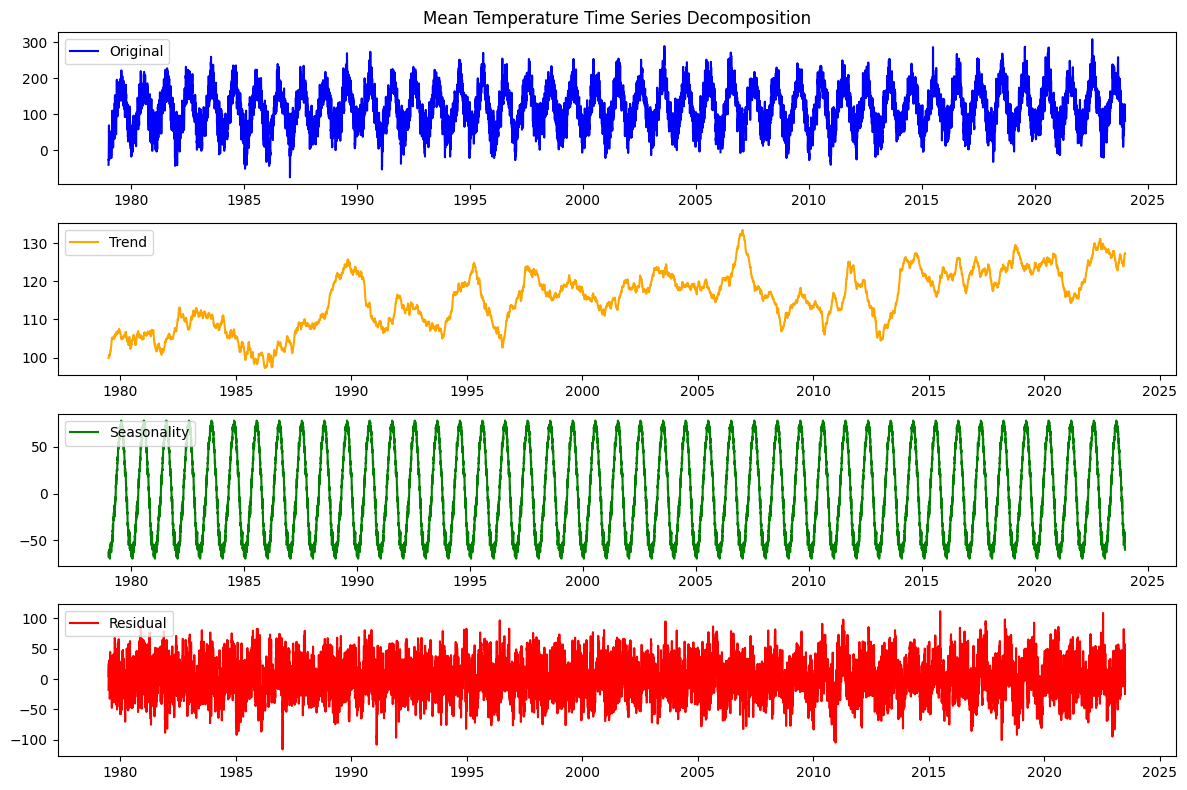

In [36]:
# Plot the decomposition result
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['TG'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title("Mean Temperature Time Series Decomposition")
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

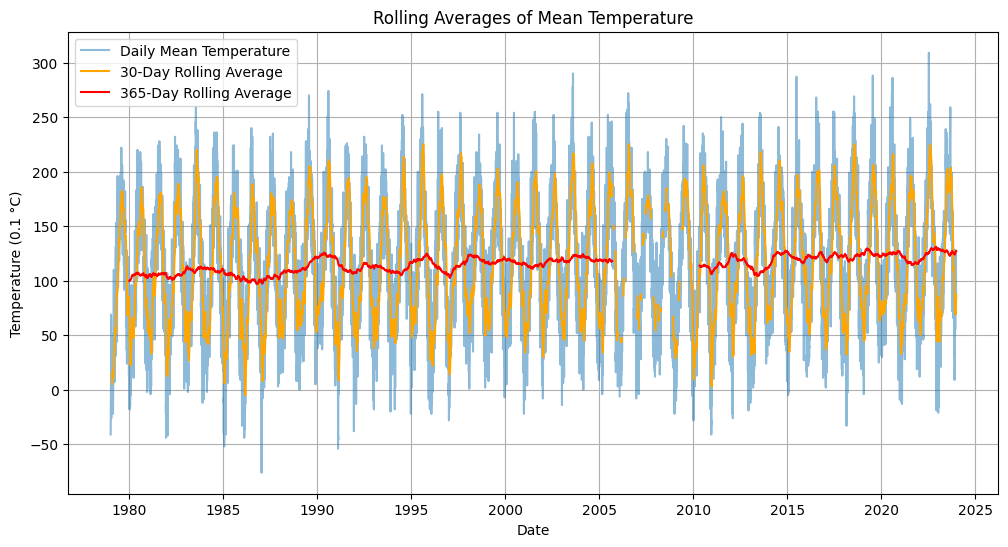

In [37]:
df['TG_30d'] = df['TG'].rolling(window=30).mean()
df['TG_365d'] = df['TG'].rolling(window=365).mean()

# Plot the rolling averages
plt.figure(figsize=(12, 6))
plt.plot(df['TG'], label='Daily Mean Temperature', alpha=0.5)
plt.plot(df['TG_30d'], label='30-Day Rolling Average', color='orange')
plt.plot(df['TG_365d'], label='365-Day Rolling Average', color='red')
plt.title("Rolling Averages of Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (0.1 °C)")
plt.legend()
plt.grid()
plt.show()

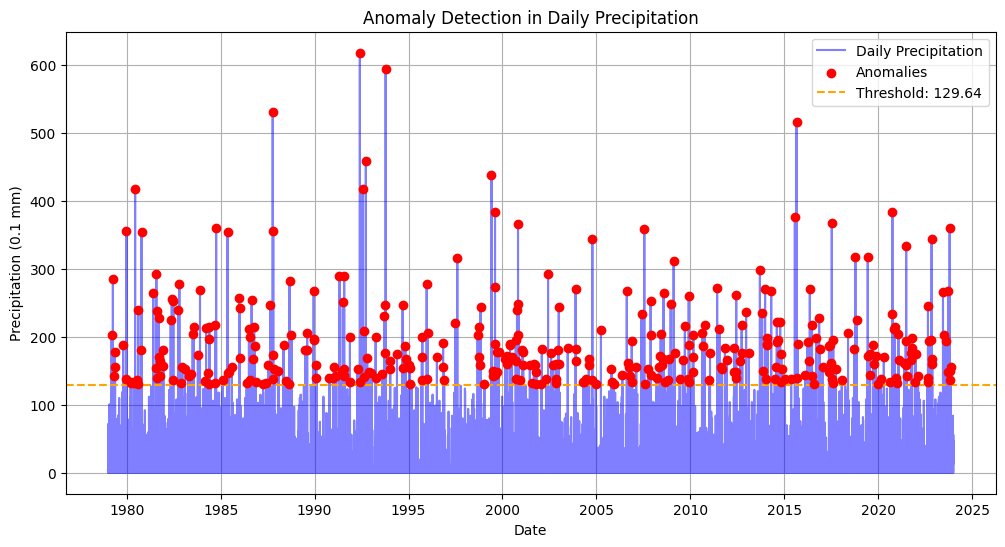

In [38]:
threshold = df['RR'].mean() + 3 * df['RR'].std()  # Mean + 3 standard deviations
anomalies = df[df['RR'] > threshold]

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['RR'], label='Daily Precipitation', color='blue', alpha=0.5)
plt.scatter(anomalies.index, anomalies['RR'], color='red', label='Anomalies', zorder=5)
plt.axhline(y=threshold, color='orange', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.title("Anomaly Detection in Daily Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation (0.1 mm)")
plt.legend()
plt.grid()
plt.show()

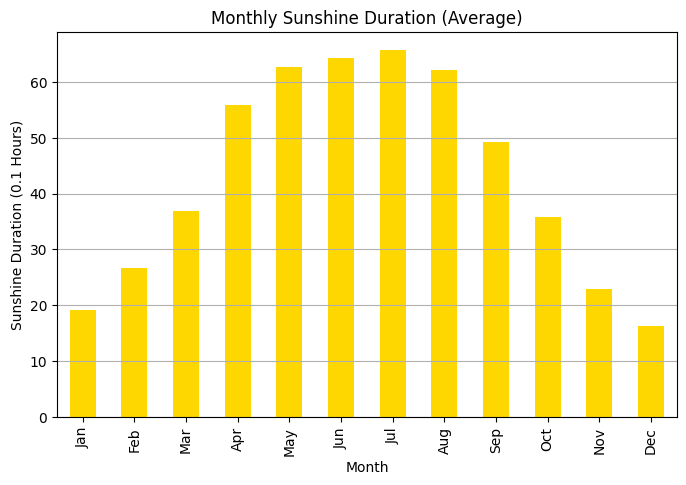

Time-Series Analysis completed.


In [40]:
monthly_sunshine = df['SS'].groupby(df.index.month).mean()

# Plot monthly seasonality
plt.figure(figsize=(8, 5))
monthly_sunshine.plot(kind='bar', color='gold')
plt.title("Monthly Sunshine Duration (Average)")
plt.xlabel("Month")
plt.ylabel("Sunshine Duration (0.1 Hours)")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)
plt.grid(axis='y')
plt.show()

print("Time-Series Analysis completed.")

In [41]:
print("Dataset preview:")
print(df.head())

Dataset preview:
              TX  Q_TX    TN  Q_TN    TG  Q_TG  ...   CC  Q_CC  Month  Season  TG_30d  TG_365d
DATE                                            ...                                           
1979-01-01  23.0     0 -75.0     0 -41.0     0  ...  2.0     0      1  Winter     NaN      NaN
1979-01-02  16.0     0 -75.0     0 -26.0     0  ...  6.0     0      1  Winter     NaN      NaN
1979-01-03  13.0     0 -72.0     0 -28.0     0  ...  5.0     0      1  Winter     NaN      NaN
1979-01-04  -3.0     0 -65.0     0 -26.0     0  ...  8.0     0      1  Winter     NaN      NaN
1979-01-05  56.0     0 -14.0     0  -8.0     0  ...  6.0     0      1  Winter     NaN      NaN

[5 rows x 24 columns]


In [42]:
numerical_data = df.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

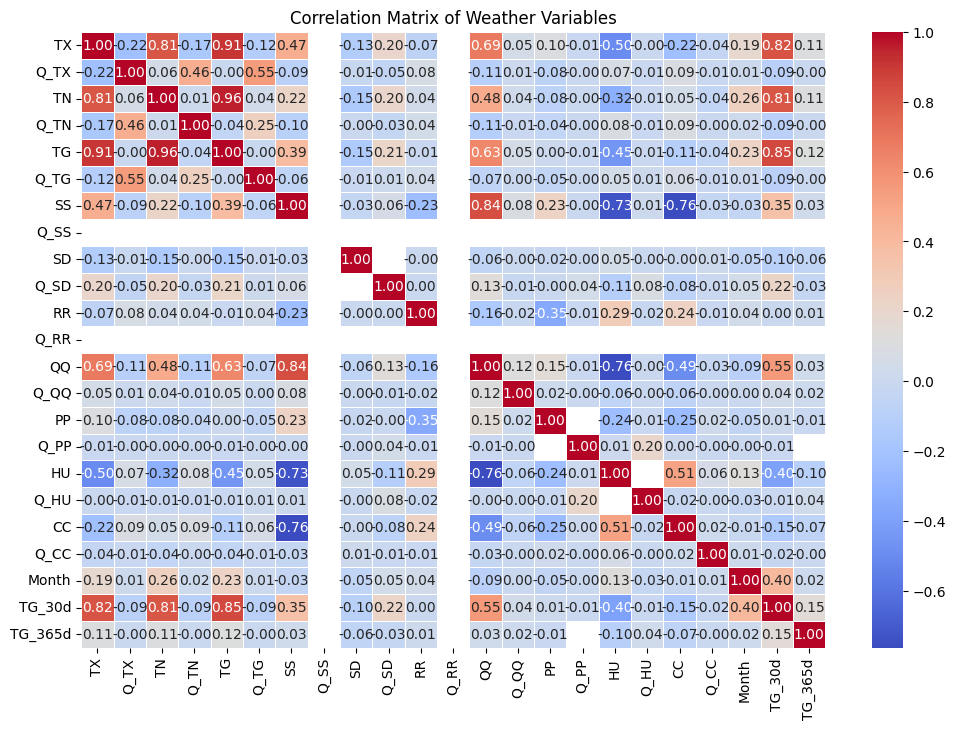

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Weather Variables")
plt.show()

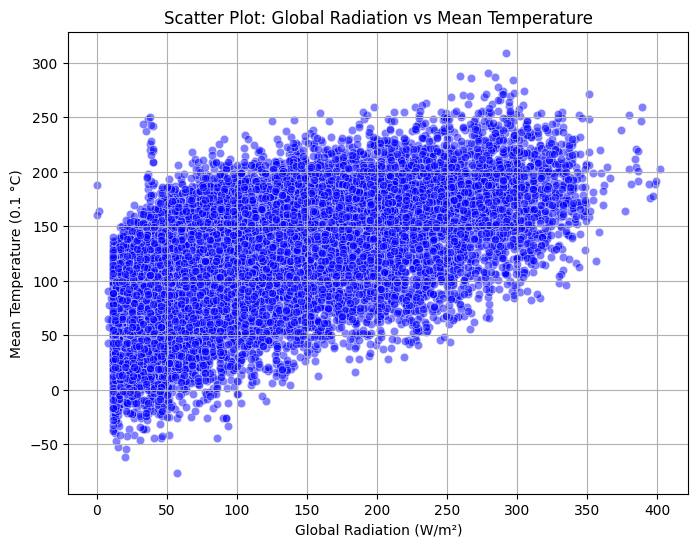

In [44]:
### 2. Scatter Plots for Key Relationships
# Scatter plot: Global radiation (QQ) vs Mean temperature (TG)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['QQ'], y=df['TG'], alpha=0.5, color='blue')
plt.title("Scatter Plot: Global Radiation vs Mean Temperature")
plt.xlabel("Global Radiation (W/m²)")
plt.ylabel("Mean Temperature (0.1 °C)")
plt.grid()
plt.show()

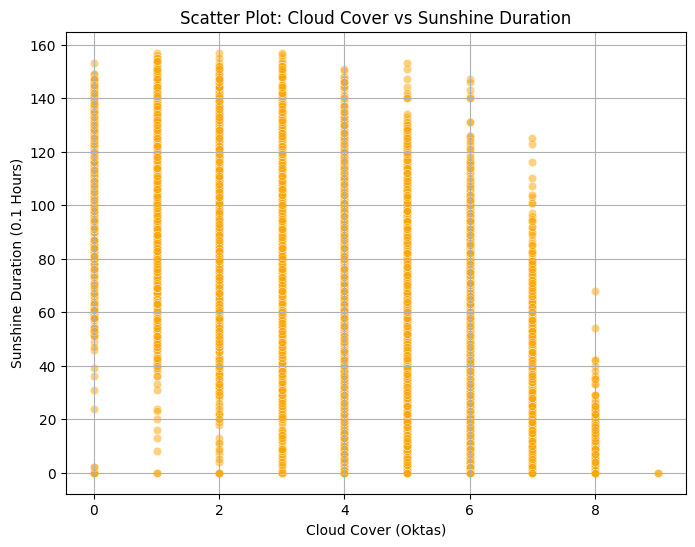

In [45]:
# Scatter plot: Cloud cover (CC) vs Sunshine duration (SS)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['CC'], y=df['SS'], alpha=0.5, color='orange')
plt.title("Scatter Plot: Cloud Cover vs Sunshine Duration")
plt.xlabel("Cloud Cover (Oktas)")
plt.ylabel("Sunshine Duration (0.1 Hours)")
plt.grid()
plt.show()

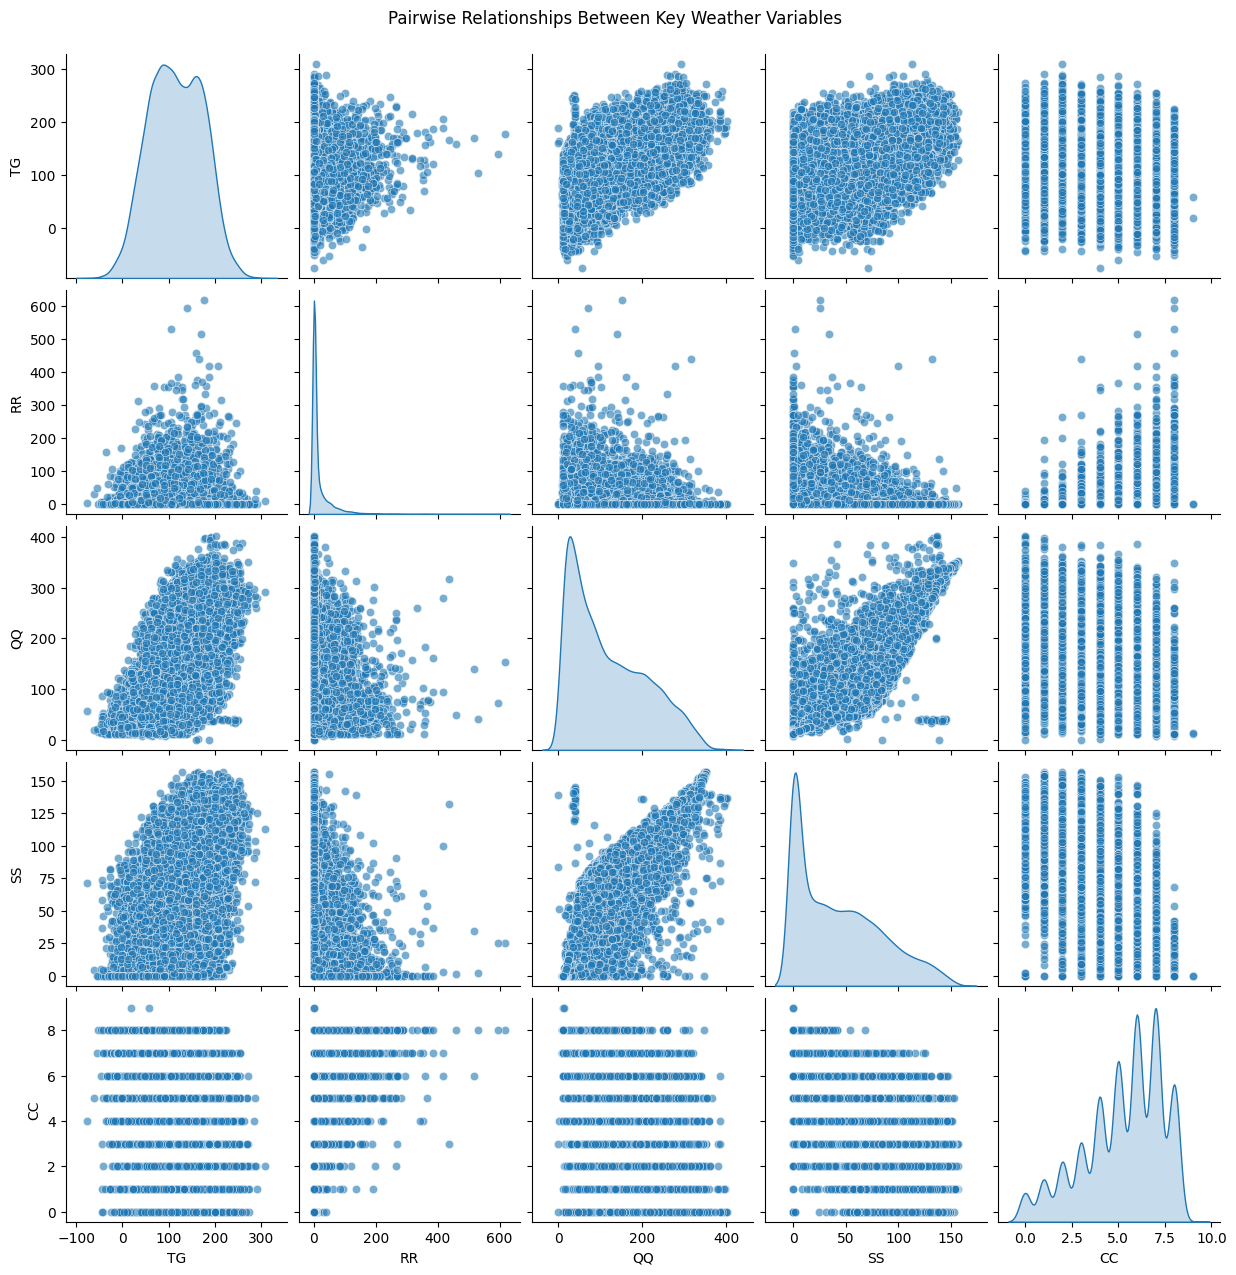

In [46]:
key_variables = ['TG', 'RR', 'QQ', 'SS', 'CC']  # Select key columns for pairplot
sns.pairplot(df[key_variables], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pairwise Relationships Between Key Weather Variables", y=1.02)
plt.show()

In [47]:
df['Month'] = df.index.month
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})

In [48]:
# Calculate correlations seasonally for numerical columns
seasonal_correlations = df.groupby('Season')[key_variables].apply(lambda x: x.corr())
print("Seasonal Correlations:")
print(seasonal_correlations)

Seasonal Correlations:
                 TG        RR        QQ        SS        CC
Season                                                     
Autumn TG  1.000000  0.010469  0.537461  0.194890  0.030474
       RR  0.010469  1.000000 -0.190866 -0.240256  0.245281
       QQ  0.537461 -0.190866  1.000000  0.842874 -0.573906
       SS  0.194890 -0.240256  0.842874  1.000000 -0.782684
       CC  0.030474  0.245281 -0.573906 -0.782684  1.000000
Spring TG  1.000000 -0.039606  0.493011  0.308575 -0.164876
       RR -0.039606  1.000000 -0.214948 -0.264165  0.276058
       QQ  0.493011 -0.214948  1.000000  0.902173 -0.691381
       SS  0.308575 -0.264165  0.902173  1.000000 -0.818280
       CC -0.164876  0.276058 -0.691381 -0.818280  1.000000
Summer TG  1.000000 -0.113514  0.284052  0.331001 -0.342301
       RR -0.113514  1.000000 -0.248932 -0.268628  0.242287
       QQ  0.284052 -0.248932  1.000000  0.888995 -0.682760
       SS  0.331001 -0.268628  0.888995  1.000000 -0.801533
       CC -0.3423

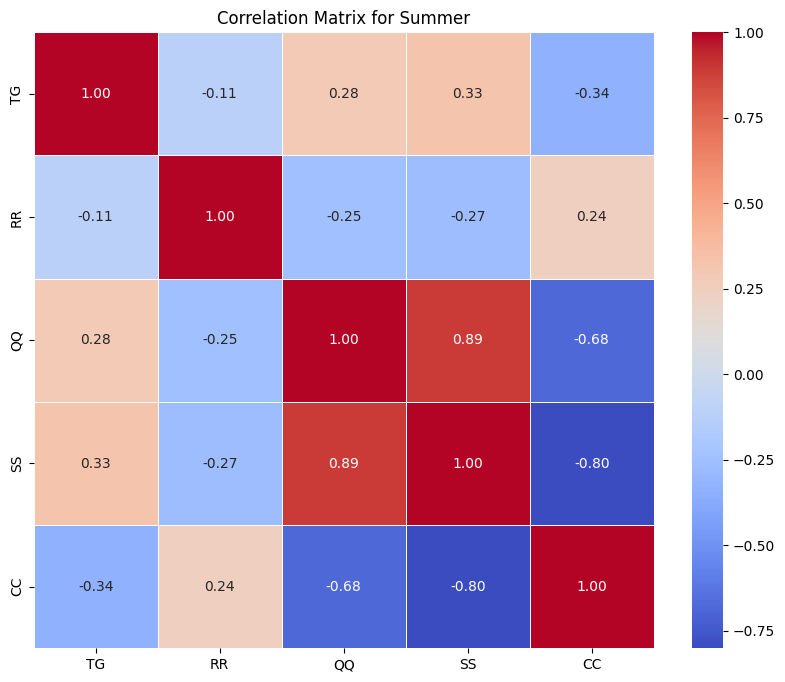

Correlation and Relationships Analysis completed.


In [49]:
# Plot seasonal correlations (example: Summer correlations)
summer_correlations = seasonal_correlations.loc['Summer']
plt.figure(figsize=(10, 8))
sns.heatmap(summer_correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Summer")
plt.show()

print("Correlation and Relationships Analysis completed.")

Dataset preview:
              TX  Q_TX    TN  Q_TN    TG  Q_TG  ...   CC  Q_CC  Month  Season  TG_30d  TG_365d
DATE                                            ...                                           
1979-01-01  23.0     0 -75.0     0 -41.0     0  ...  2.0     0      1  Winter     NaN      NaN
1979-01-02  16.0     0 -75.0     0 -26.0     0  ...  6.0     0      1  Winter     NaN      NaN
1979-01-03  13.0     0 -72.0     0 -28.0     0  ...  5.0     0      1  Winter     NaN      NaN
1979-01-04  -3.0     0 -65.0     0 -26.0     0  ...  8.0     0      1  Winter     NaN      NaN
1979-01-05  56.0     0 -14.0     0  -8.0     0  ...  6.0     0      1  Winter     NaN      NaN

[5 rows x 24 columns]
Number of Heatwave Days: 847
Number of Cold Spell Days: 843


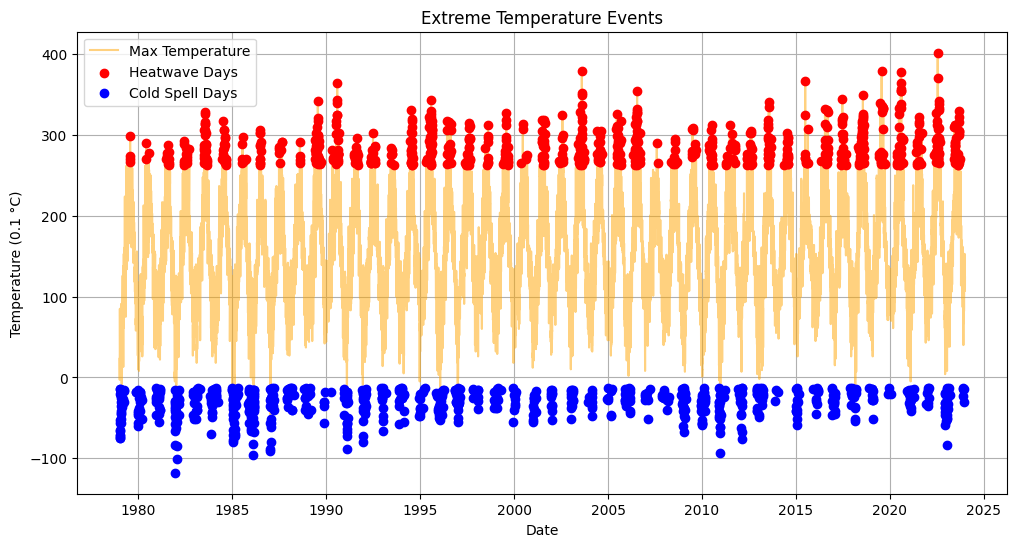

Number of Heavy Rainfall Days: 828


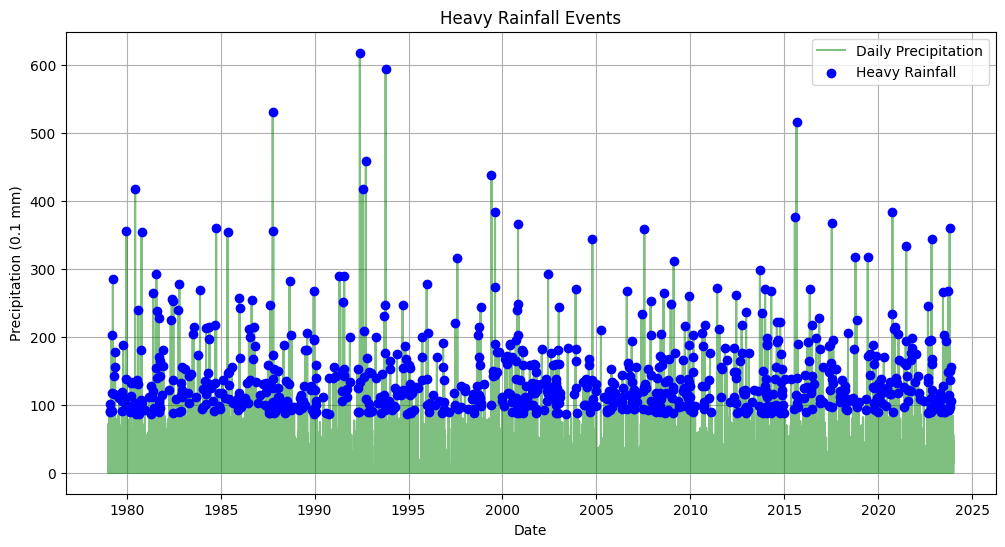

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


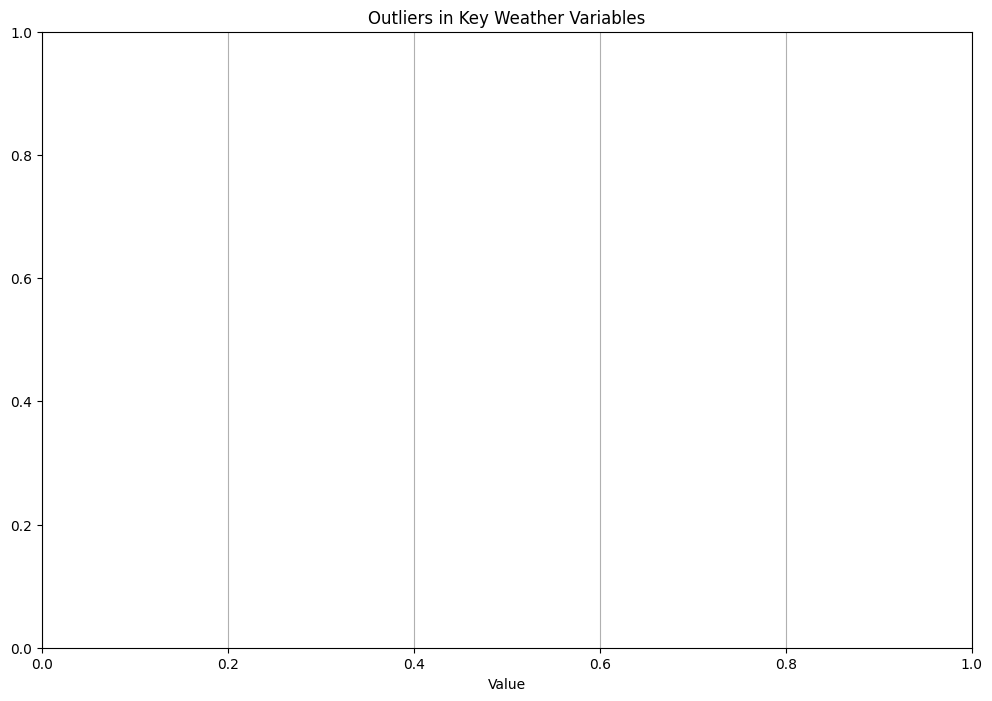

<Figure size 1200x600 with 0 Axes>

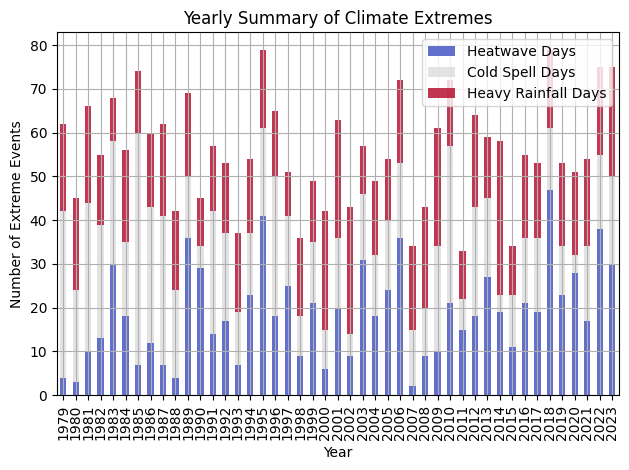

Climate Extremes and Outliers Analysis completed.


In [50]:
print("Dataset preview:")
print(df.head())

### 1. Identifying Extreme Temperature Events
# Define thresholds for heatwaves and cold spells (example: 95th and 5th percentiles)
heatwave_threshold = df['TX'].quantile(0.95)
cold_spell_threshold = df['TN'].quantile(0.05)

# Filter data for extreme events
heatwaves = df[df['TX'] >= heatwave_threshold]
cold_spells = df[df['TN'] <= cold_spell_threshold]

# Print the number of extreme events
print(f"Number of Heatwave Days: {len(heatwaves)}")
print(f"Number of Cold Spell Days: {len(cold_spells)}")

# Plot Heatwave and Cold Spell Events
plt.figure(figsize=(12, 6))
plt.plot(df['TX'], label='Max Temperature', alpha=0.5, color='orange')
plt.scatter(heatwaves.index, heatwaves['TX'], color='red', label='Heatwave Days', zorder=5)
plt.scatter(cold_spells.index, cold_spells['TN'], color='blue', label='Cold Spell Days', zorder=5)
plt.title("Extreme Temperature Events")
plt.xlabel("Date")
plt.ylabel("Temperature (0.1 °C)")
plt.legend()
plt.grid()
plt.show()

### 2. Extreme Precipitation Events
# Define a threshold for heavy rainfall (e.g., 95th percentile)
precipitation_threshold = df['RR'].quantile(0.95)
heavy_rainfall = df[df['RR'] >= precipitation_threshold]

# Print the number of heavy rainfall events
print(f"Number of Heavy Rainfall Days: {len(heavy_rainfall)}")

# Plot Heavy Rainfall Events
plt.figure(figsize=(12, 6))
plt.plot(df['RR'], label='Daily Precipitation', alpha=0.5, color='green')
plt.scatter(heavy_rainfall.index, heavy_rainfall['RR'], color='blue', label='Heavy Rainfall', zorder=5)
plt.title("Heavy Rainfall Events")
plt.xlabel("Date")
plt.ylabel("Precipitation (0.1 mm)")
plt.legend()
plt.grid()
plt.show()

### 3. Outlier Detection using Boxplots
# Boxplots to identify outliers for key weather variables
key_variables = ['TX', 'TN', 'RR', 'SS', 'QQ']  # Key columns to analyze
plt.figure(figsize=(12, 8))
sns.boxplot(df=df[key_variables], orient='h', palette='Set2')
plt.title("Outliers in Key Weather Variables")
plt.xlabel("Value")
plt.grid(axis='x')
plt.show()

### 4. Yearly Summary of Extremes
# Group by year and count the number of extreme events
df['Year'] = df.index.year
yearly_summary = pd.DataFrame({
    'Heatwave Days': df[df['TX'] >= heatwave_threshold].groupby('Year').size(),
    'Cold Spell Days': df[df['TN'] <= cold_spell_threshold].groupby('Year').size(),
    'Heavy Rainfall Days': df[df['RR'] >= precipitation_threshold].groupby('Year').size()
}).fillna(0)

# Plot Yearly Summary
plt.figure(figsize=(12, 6))
yearly_summary.plot(kind='bar', stacked=True, colormap='coolwarm', alpha=0.8)
plt.title("Yearly Summary of Climate Extremes")
plt.xlabel("Year")
plt.ylabel("Number of Extreme Events")
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

print("Climate Extremes and Outliers Analysis completed.")